# Problem Statement

**Problem Scenario:**

The customer always looks forward to specialized treatment, whether shopping on
an e-commerce website or watching Netflix. The customer desires content that
aligns with their preferences. To maintain customer engagement, companies must
consistently provide the most relevant information.
Starting with Spotify, a Swedish audio streaming and media service provider, boasts
over 456 million active monthly users, including more than 195 million paid
subscribers as of September 2022. The company aims to create cohorts of different
songs to enhance song recommendations. These cohorts will be based on various
relevant features, ensuring that each group contains similar types of songs.

</br>

----

</br>

**Problem Objective:**

As a data scientist, you should perform exploratory data analysis and cluster
analysis to create cohorts of songs. The goal is to better understand the various
factors that create a cohort of songs.

# Step 1: Load Data and Perform Data Quality Checks

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset into a dataframe(update this path as per your file location)
df = pd.read_csv('/content/drive/MyDrive/rolling_stones_spotify.csv')

### Initial data inspection and data cleaning

In [112]:
# Display first five rows
df.head(5)

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [113]:
df.tail(5)

Unnamed: 0                        name               album release_date  \
1605        1605                       Carol  The Rolling Stones   1964-04-16   
1606        1606                     Tell Me  The Rolling Stones   1964-04-16   
1607        1607         Can I Get A Witness  The Rolling Stones   1964-04-16   
1608        1608  You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609        1609             Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  
1605    0.967          39       154080  
1606    0.446          36       245266  
1607    0.835          30       176080  
1608    0.532          27       121680  
1609    0.969          35       189186

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [115]:
df.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [116]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

### Result: No missing value found

In [117]:
# check for duplidate values
df.duplicated().sum()

np.int64(0)

### Result No duplicate records found

In [118]:
# Display all column names
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [119]:
df.shape

(1610, 18)

In [120]:
# Drop 'Unnamed: 0' column
df = df.drop(['Unnamed: 0'], axis=1)

In [121]:
df.shape

(1610, 17)

# Step 2. Refine the data for further processing based on your findings

### Feature engineering

In [122]:
# convert data release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Create a feature for the decade of release
df['release_decade'] = (df['release_year'] // 10) * 10

# Ensure consistent capitalization for album names
df['album'] = df['album'].str.title()

# Step 3: Exploratory Data Analysis (EDA)

In [123]:
#identification of Numerical and categorical columns
numerical_columns  = df.select_dtypes(include=[ 'int32', 'int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(numerical_columns)
print(categorical_columns)

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms', 'release_year',
       'release_decade'],
      dtype='object')
Index(['name', 'album', 'id', 'uri'], dtype='object')


In [124]:
# Define list of numerical features to be used for clustering/scaling
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms','release_decade']

## Step 3.1 Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

In [125]:
#Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
df[numerical_features].corr()

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000      0.070017 -0.363819          0.061403   
danceability          0.070017      1.000000 -0.300536         -0.031812   
energy               -0.363819     -0.300536  1.000000          0.120261   
instrumentalness      0.061403     -0.031812  0.120261          1.000000   
liveness             -0.117739     -0.516387  0.511188          0.008873   
loudness             -0.237083     -0.249406  0.698039          0.012524   
speechiness          -0.021774     -0.322684  0.417214          0.009586   
tempo                -0.171003     -0.324398  0.201885          0.010961   
valence              -0.138803      0.546210  0.046217          0.103480   
popularity            0.108046      0.141205 -0.057272         -0.010612   
duration_ms           0.039128     -0.220045  0.148876         -0.137599   
release_decade       -0.166122     -0.367594  0.414375         -0.033427   

                  liveness  loudness  speechiness     tempo   valence  \
acousticness     -0.117739 -0.237083    -0.021774 -0.171003 -0.138803   
danceability     -0.516387 -0.249406    -0.322684 -0.324398  0.546210   
energy            0.511188  0.698039     0.417214  0.201885  0.046217   
instrumentalness  0.008873  0.012524     0.009586  0.010961  0.103480   
liveness          1.000000  0.327036     0.400018  0.108855 -0.347451   
loudness          0.327036  1.000000     0.189904  0.112837 -0.027571   
speechiness       0.400018  0.189904     1.000000  0.192687 -0.399751   
tempo             0.108855  0.112837     0.192687  1.000000  0.000558   
valence          -0.347451 -0.027571    -0.399751  0.000558  1.000000   
popularity       -0.205845  0.156323    -0.136745 -0.061061  0.065333   
duration_ms       0.304735  0.221558     0.114546  0.001465 -0.244833   
release_decade    0.530265  0.414501     0.299554  0.031045 -0.294991   

                  popularity  duration_ms  release_decade  
acousticness        0.108046     0.039128       -0.166122  
danceability        0.141205    -0.220045       -0.367594  
energy             -0.057272     0.148876        0.414375  
instrumentalness   -0.010612    -0.137599       -0.033427  
liveness           -0.205845     0.304735        0.530265  
loudness            0.156323     0.221558        0.414501  
speechiness        -0.136745     0.114546        0.299554  
tempo              -0.061061     0.001465        0.031045  
valence             0.065333    -0.244833       -0.294991  
popularity          1.000000     0.074102       -0.071748  
duration_ms         0.074102     1.000000        0.302738  
release_decade     -0.071748     0.302738        1.000000

<Axes: >

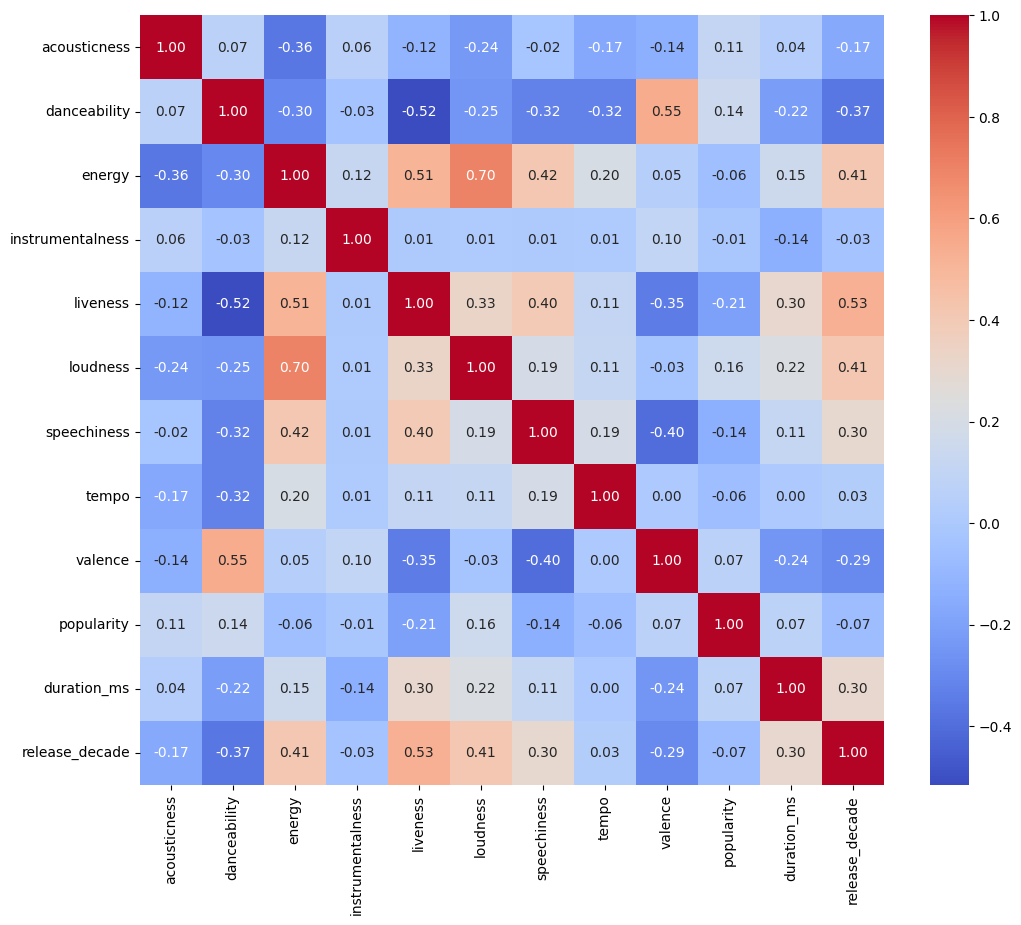

In [126]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features].corr(),annot=True,cmap='coolwarm', fmt='.2f')

The heatmap above highlights the correlations between numerical features.  
Highly correlated features may provide redundant information, so this analysis helps in:

- Identifying multicollinearity
- Deciding which features to retain for clustering


###Observations

**Summary of Song Feature Correlations**
**Energy, Loudness, and Liveness** are strongly positively correlated — more energetic songs are louder and feel more “live.”

**Danceability** increases with **valence** (happier songs), but decreases with **speechiness** and newer **release decades**.

**Speechiness** is positively correlated with **energy**, but negatively with **danceability** and **valence** — songs with more speech tend to be energetic but less danceable and happy.

**Acousticness** is negatively correlated with **energy** and **loudness**, indicating that acoustic songs are generally softer and less energetic.

**Instrumentalness** and **tempo** have weak correlations with most features.

**Popularity** does not show strong correlation with any single feature.

**Songs over time (release_decade**) tend to become more energetic, loud, and “live.”

## Step 3.2 Handle Outliers

### Check Outliers

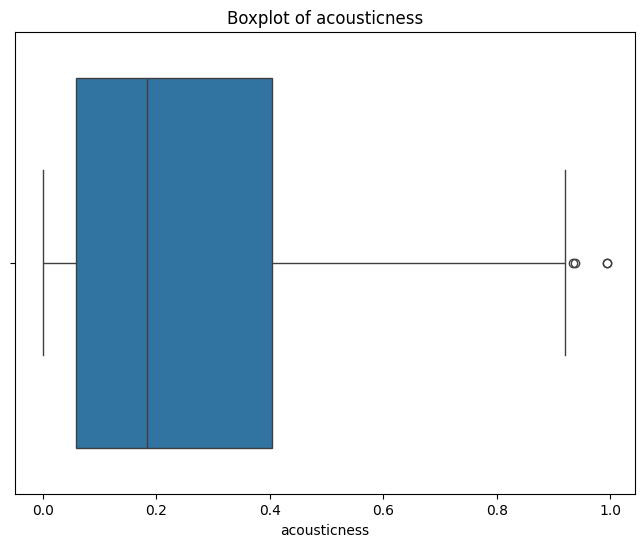

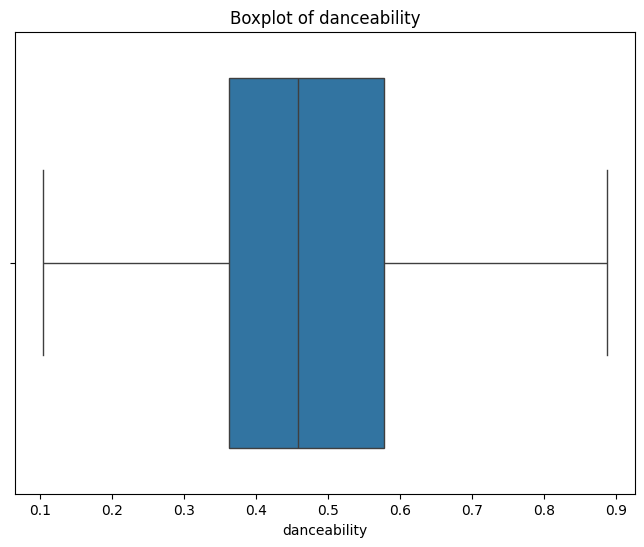

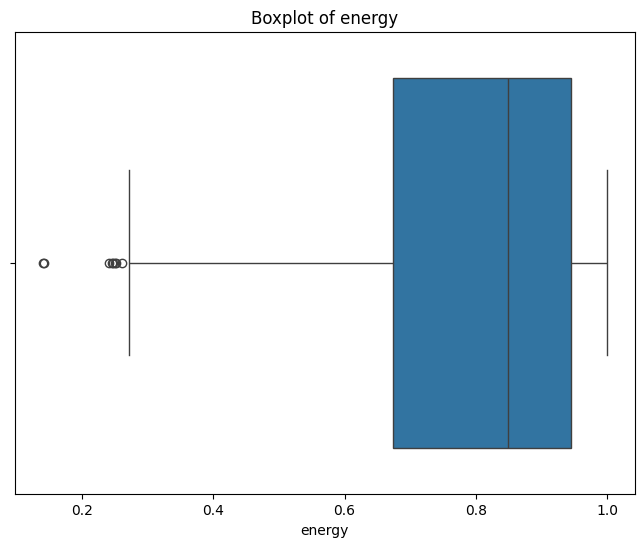

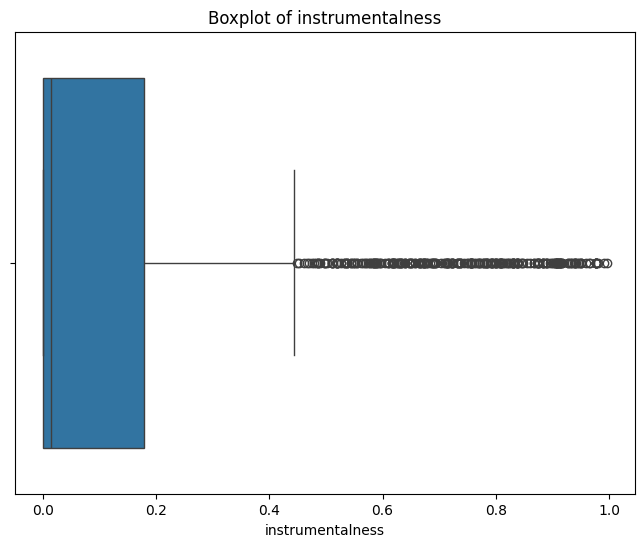

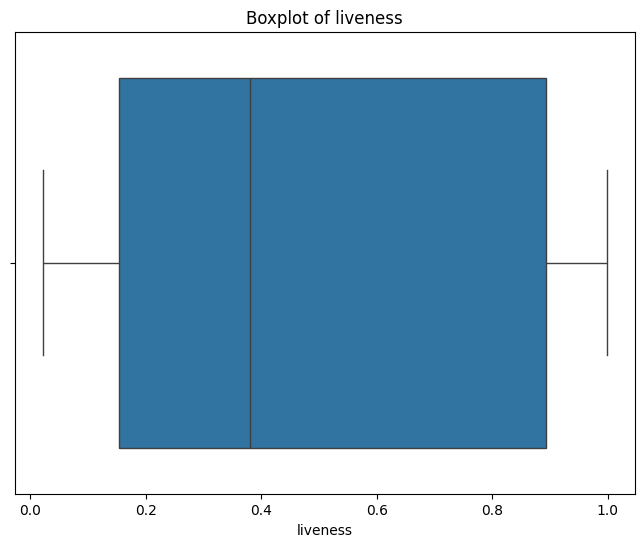

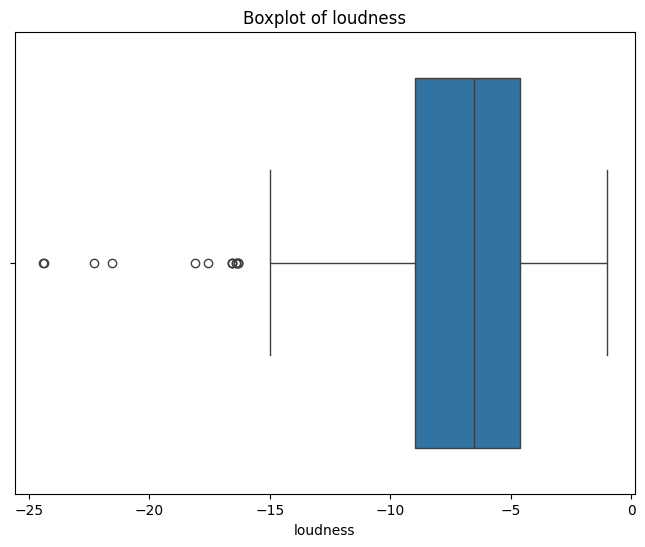

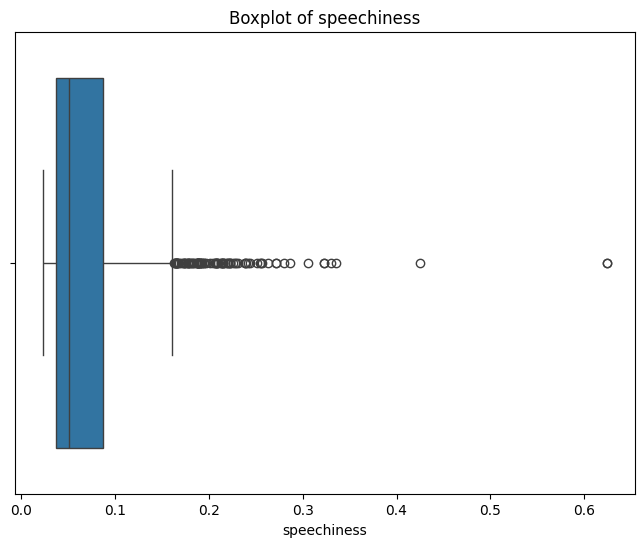

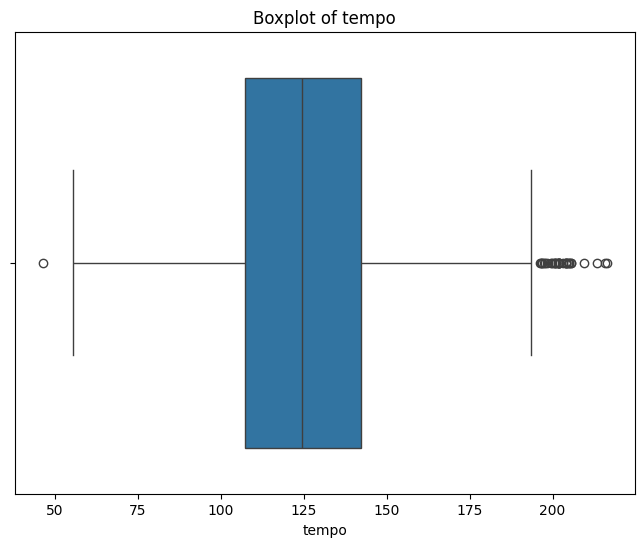

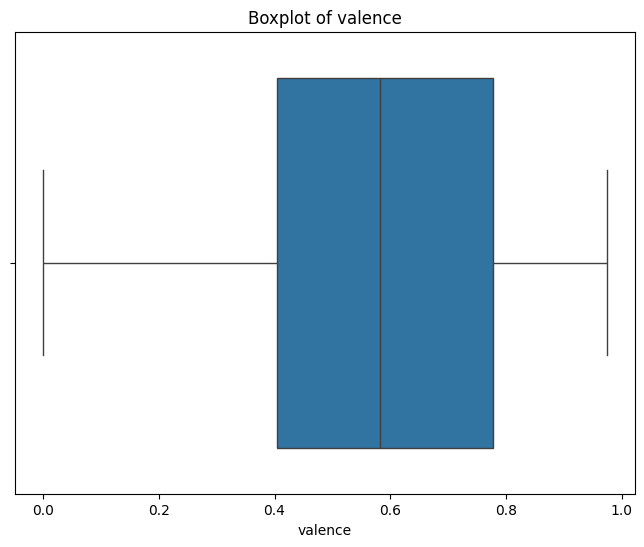

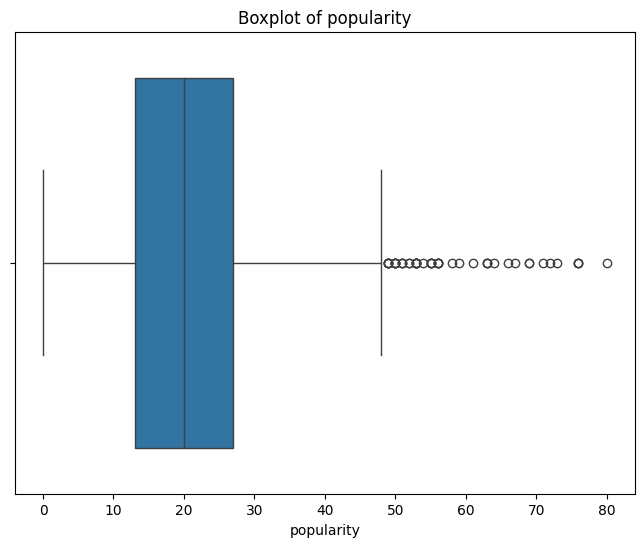

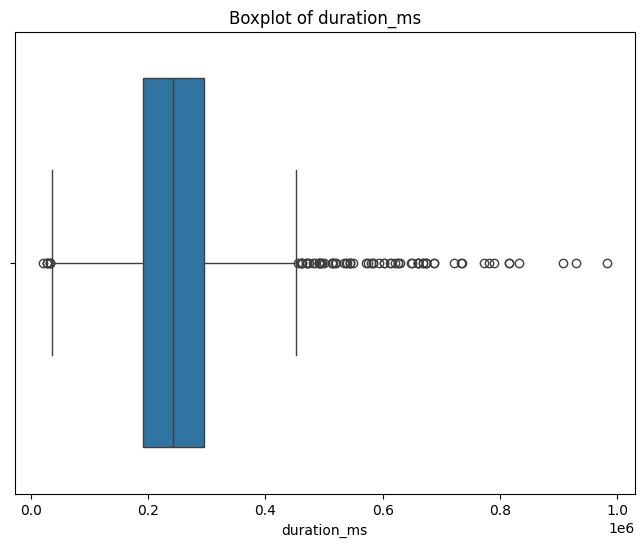

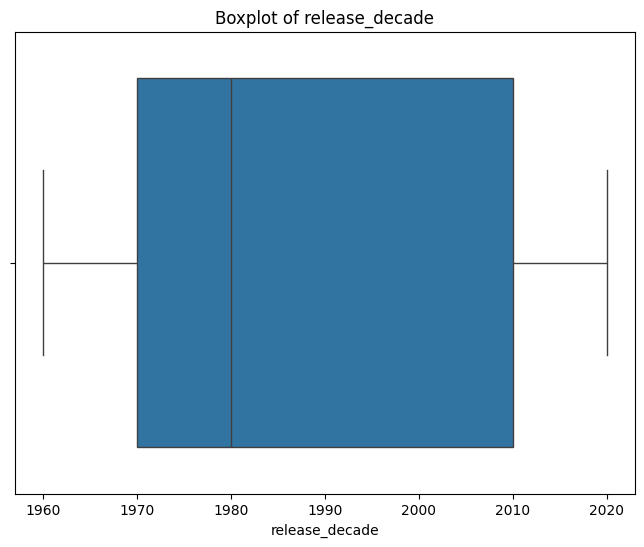

In [127]:
# Check for outliers in numerical features using boxplots
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Remove Outliers

In [128]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Remove outliers based on Z-score < 3
df = df[(np.abs(stats.zscore(df[numerical_features])) < 3).all(axis=1)]

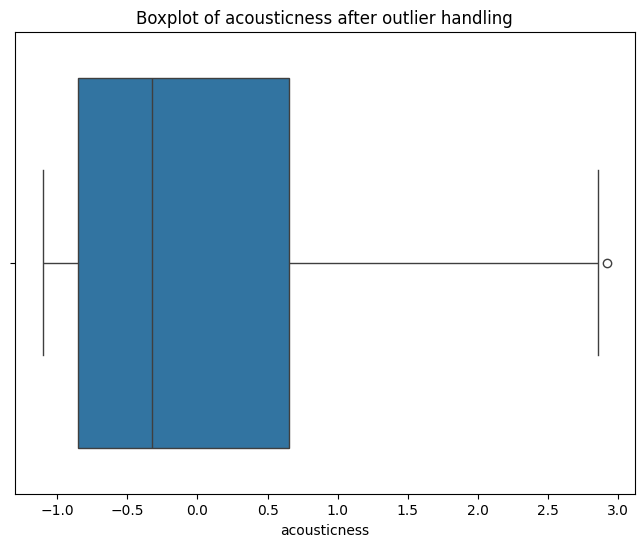

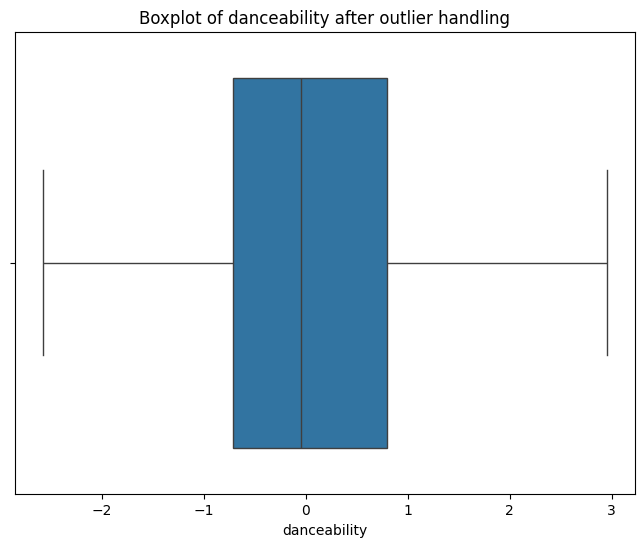

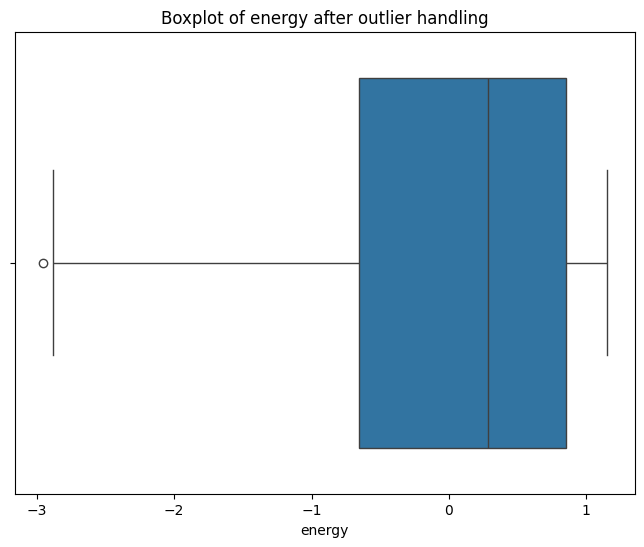

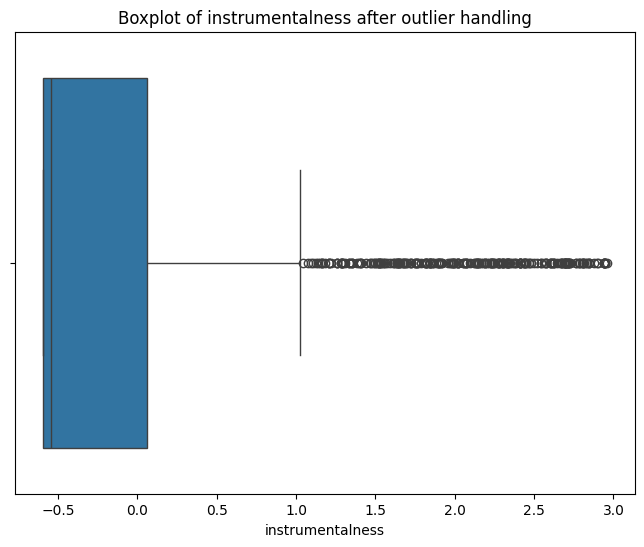

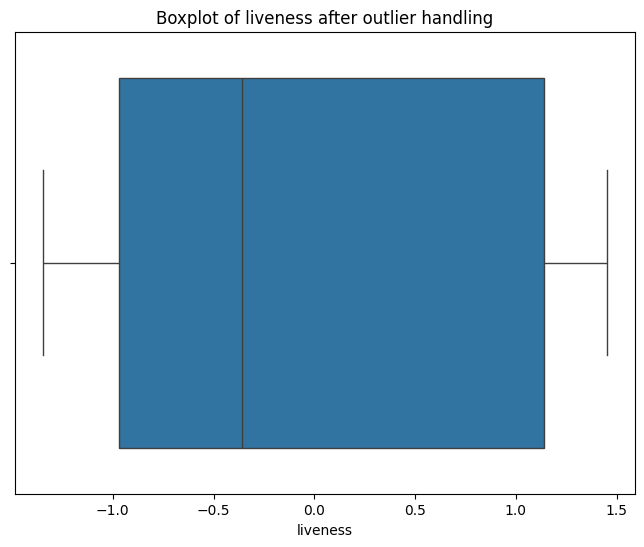

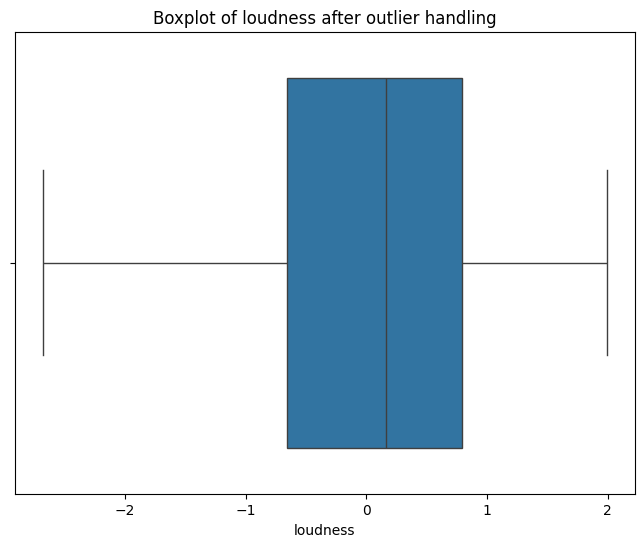

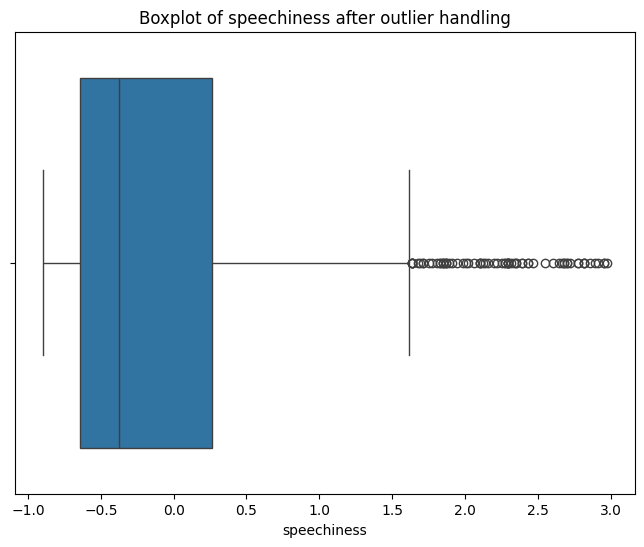

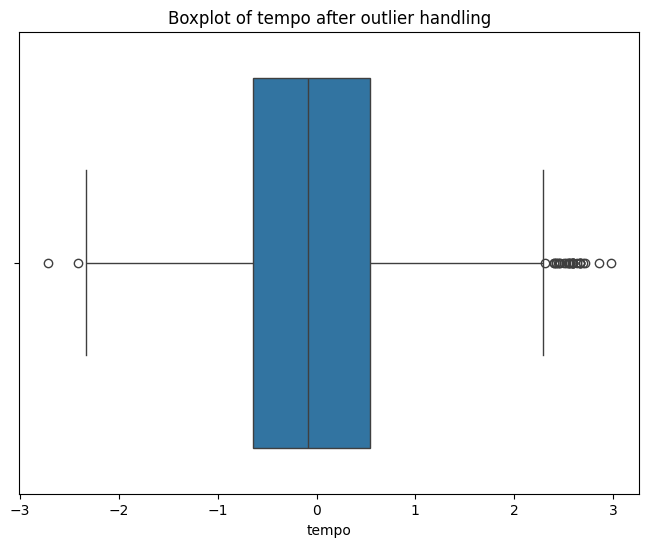

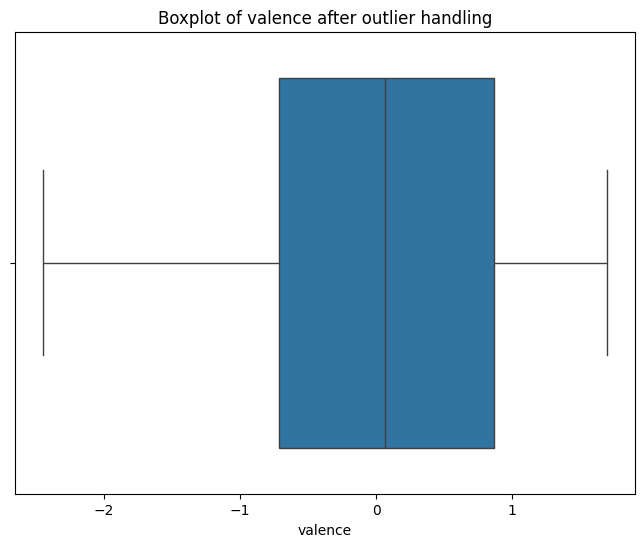

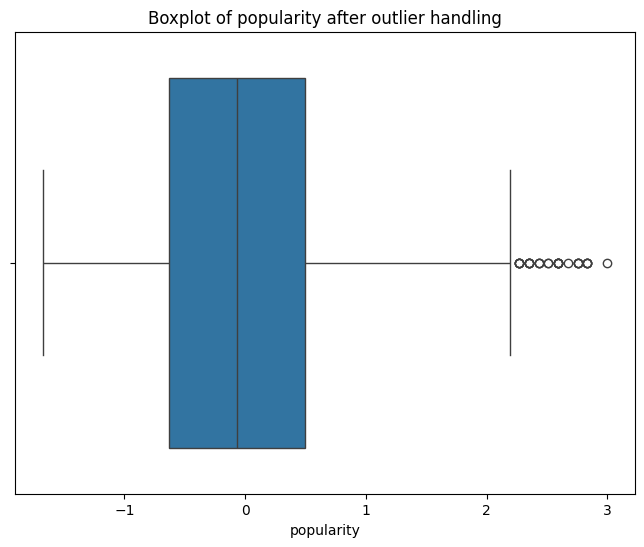

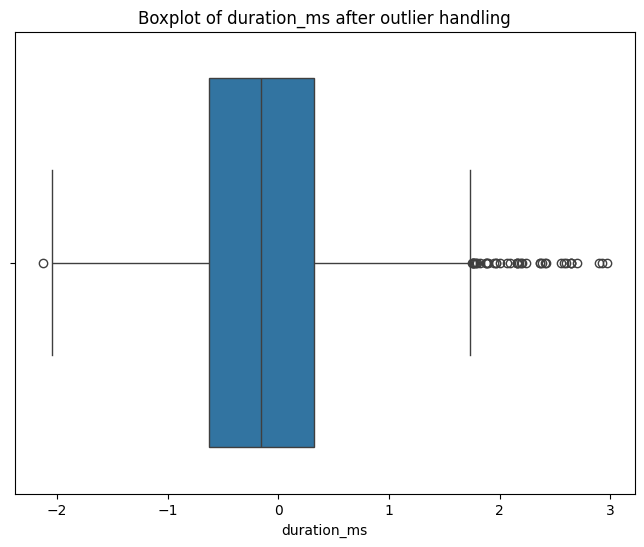

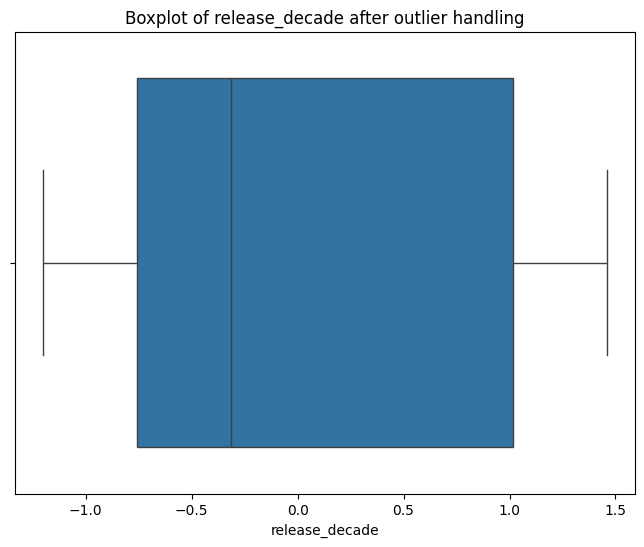

In [129]:
# Recheck for outliers after handling
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.show()

### **Observation**: no outliers found

## Step 3.3 identify irrelevant entries from given data set

In [130]:
# Identifying songs with unusually low popularity scores
low_popularity_threshold = 20  # Adjust this threshold as needed
low_popularity_songs = df[df['popularity'] < low_popularity_threshold]
print("================= Songs with low popularity =================")
print(low_popularity_songs)

# Identifying songs with very short durations
short_duration_threshold = 120 # seconds
short_duration_songs = df[df['duration_ms'] < short_duration_threshold * 1000]
print("================= Songs with short duration =================")
print(short_duration_songs)

# Identifying songs with zero danceability or other audio features
zero_danceability_songs = df[df['danceability'] == 0]
print("================= Songs with zero danceabilit =================")
print(zero_danceability_songs)

# Further analysis can be done based on other criteria and thresholds
# For example, consider outliers in acousticness, energy, instrumentalness etc.

================= Songs with low popularity =================
                             name               album release_date  \
1      Street Fighting Man - Live  Licked Live In Nyc   2022-06-10   
2              Start Me Up - Live  Licked Live In Nyc   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In Nyc   2022-06-10   
4               Don’t Stop - Live  Licked Live In Nyc   2022-06-10   
5               Monkey Man - Live  Licked Live In Nyc   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
1                2  6GVgVJBKkGJoRfarYRvGTU   
2    

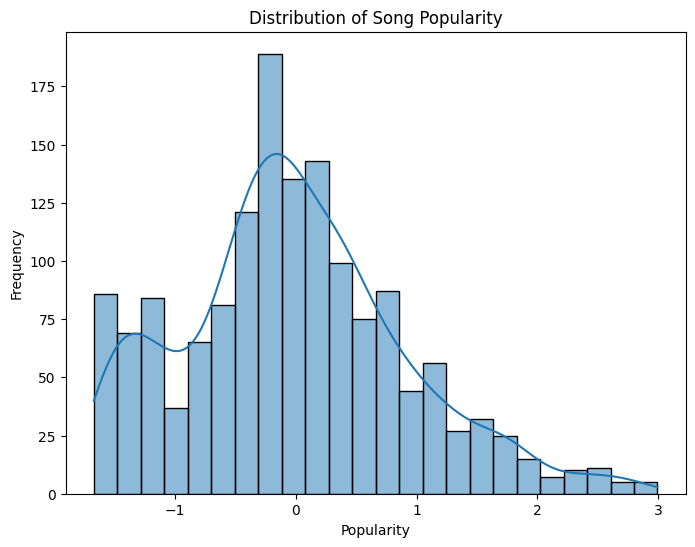

In [131]:
# Visualize the Distribution of Song Popularity
plt.figure(figsize=(8,6))
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


## Step 3.4 Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

Top two albums based on total popularity:
 album
Exile On Main Street (2010 Re-Mastered)    30.475782
Exile On Main Street (Deluxe Version)      20.681836
Name: popularity, dtype: float64


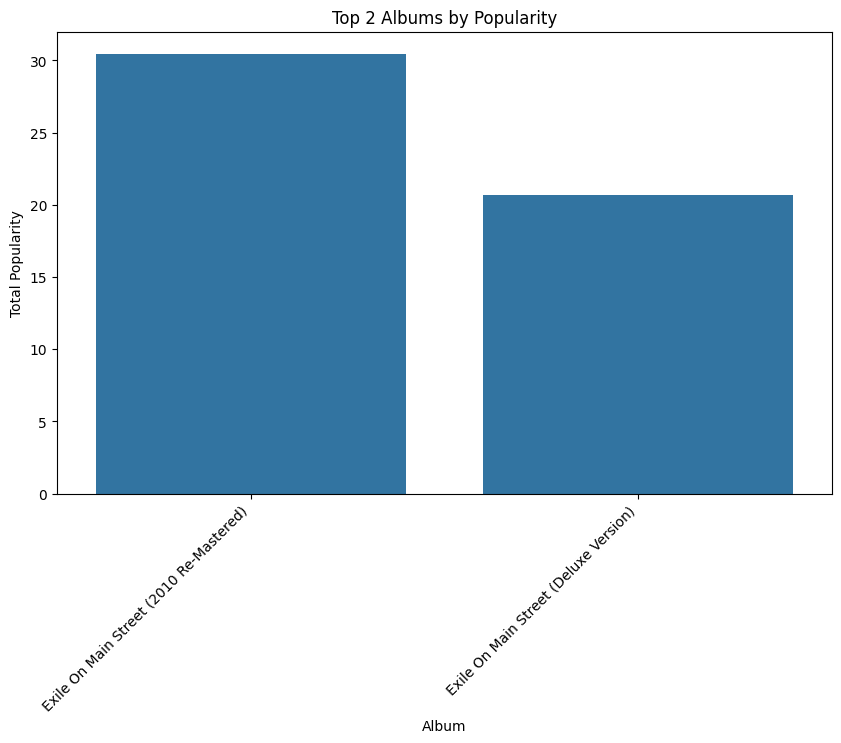

In [132]:
# Continue EDA and Feature Engineering

# a. Albums with the most popular songs
album_popularity = df.groupby('album')['popularity'].sum().sort_values(ascending=False)
top_two_albums = album_popularity.head(2)
print("Top two albums based on total popularity:\n", top_two_albums)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_two_albums.index, y=top_two_albums.values)
plt.title('Top 2 Albums by Popularity')
plt.xlabel('Album')
plt.ylabel('Total Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()

## Step 3.5 Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

<Figure size 1200x1000 with 0 Axes>

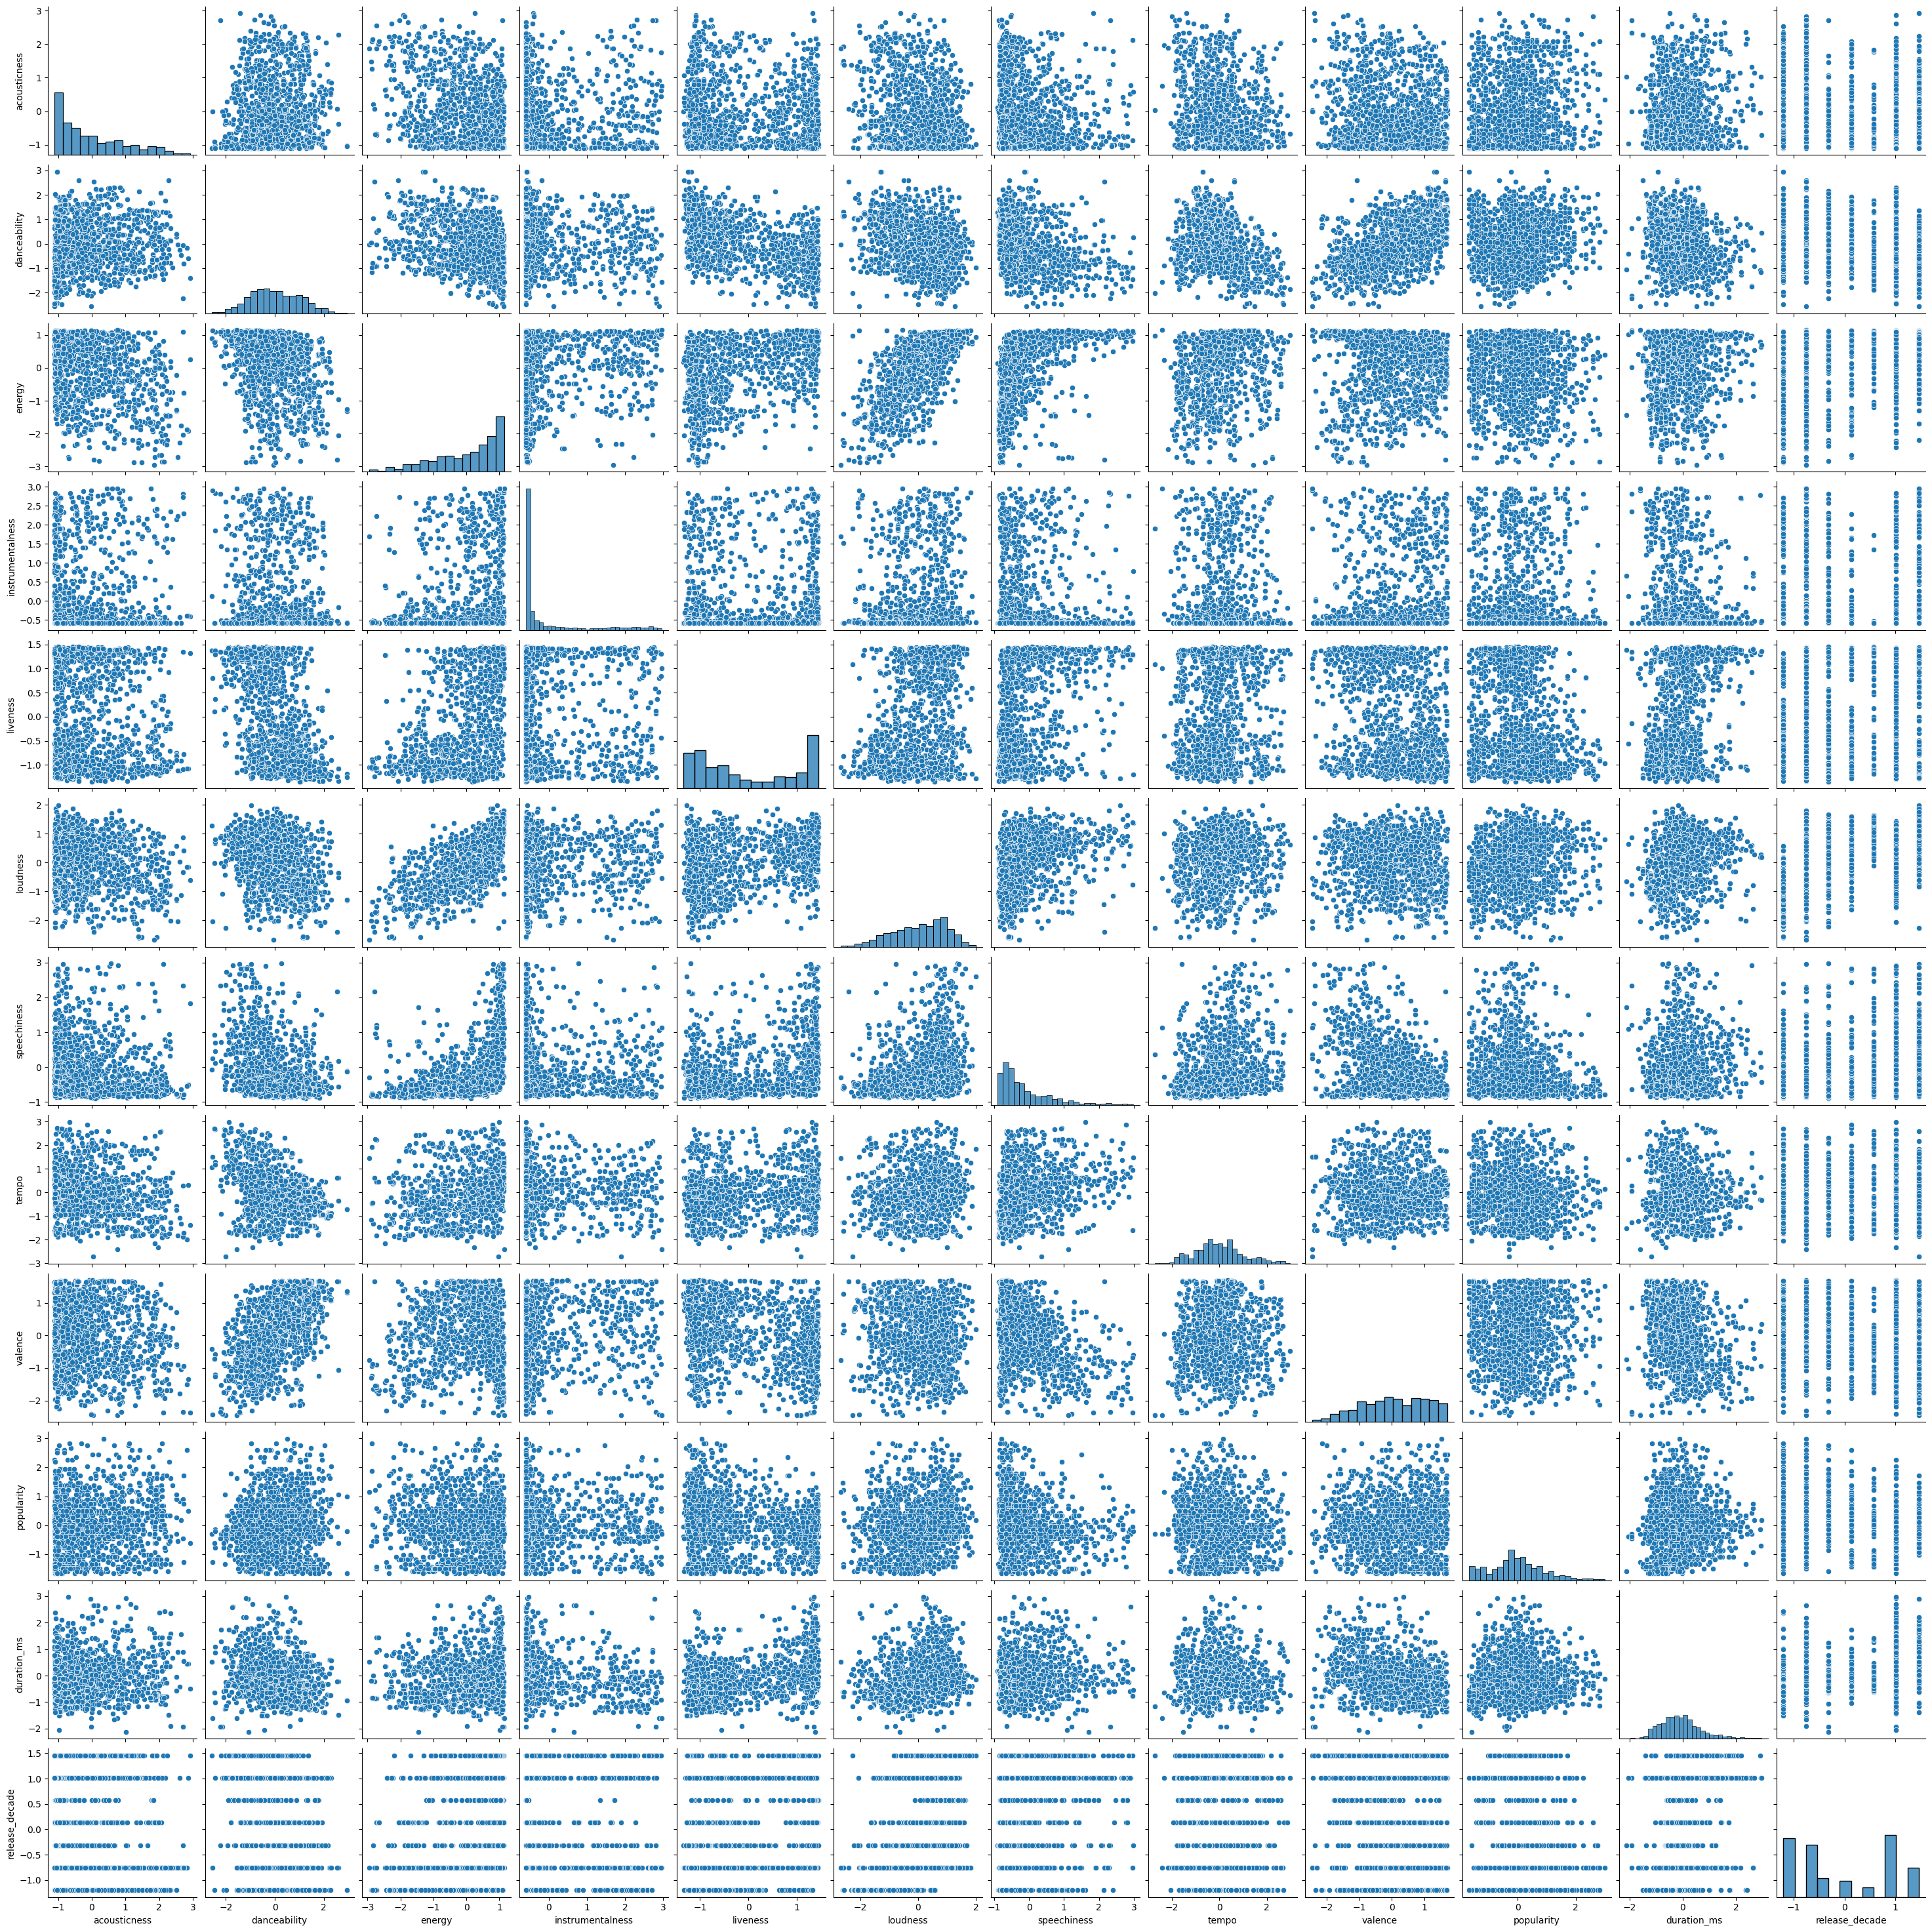

In [133]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12,10))
sns.pairplot(df[numerical_features])

## Step 3.6 Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

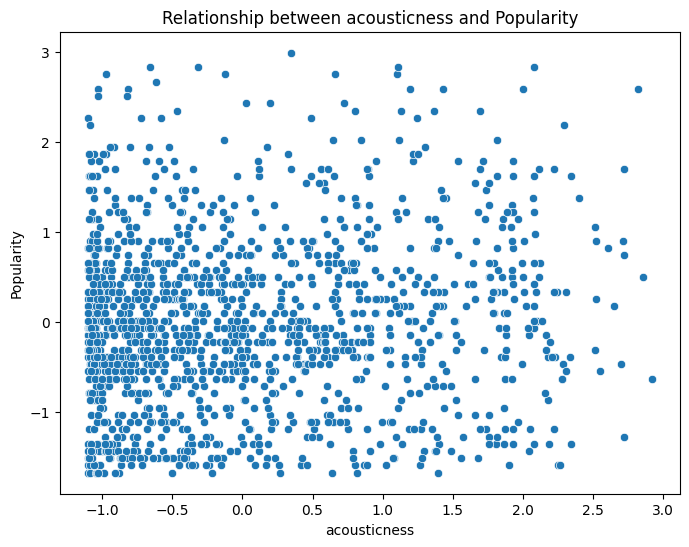

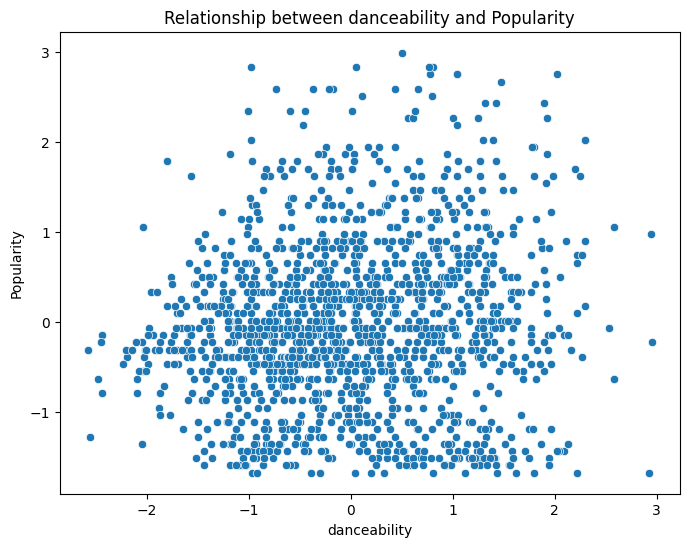

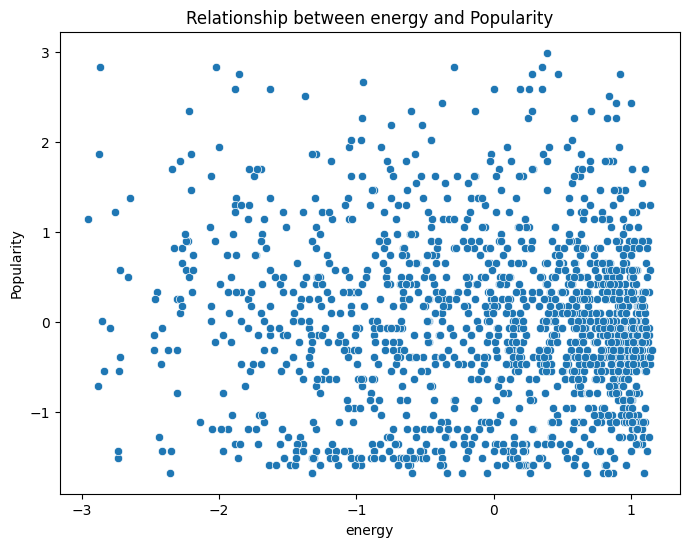

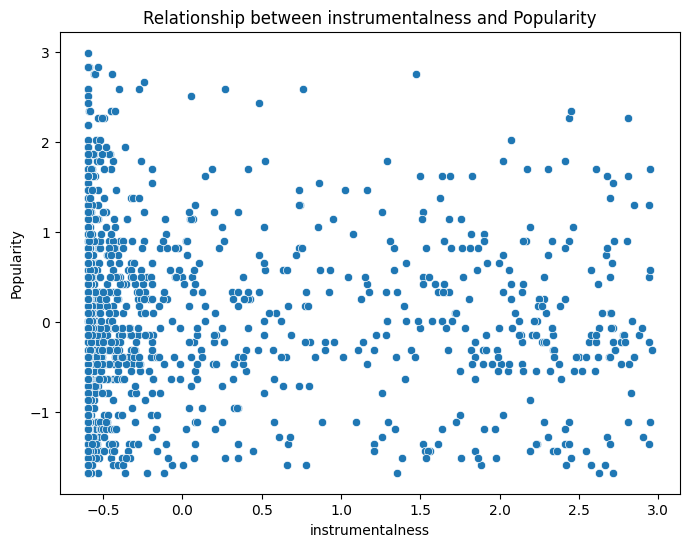

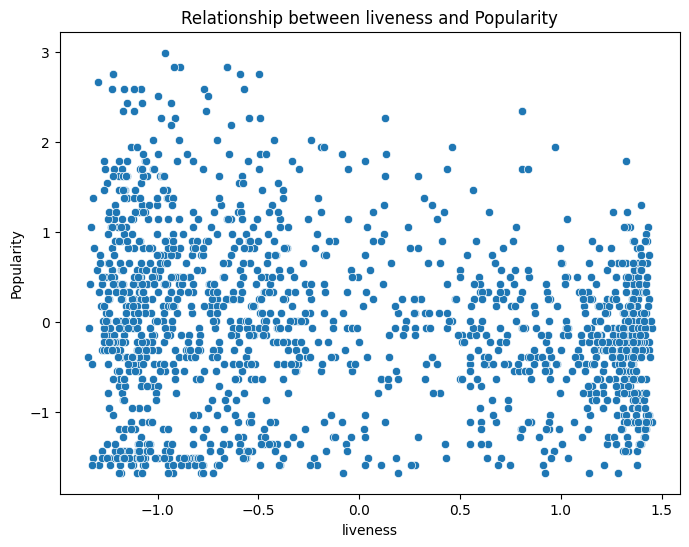

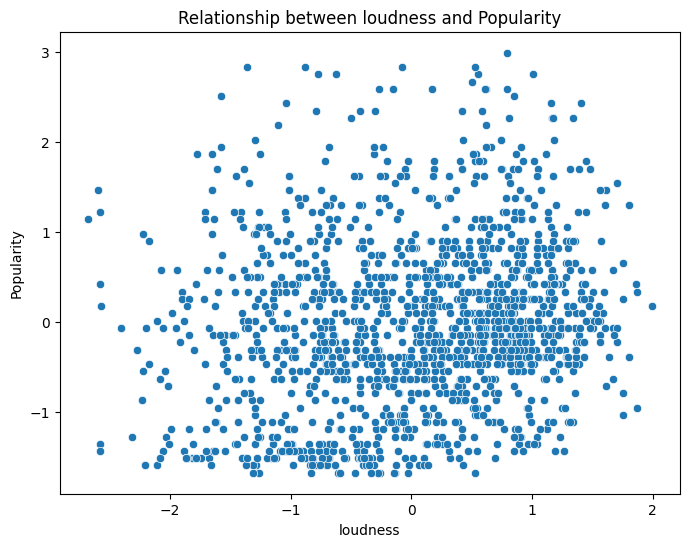

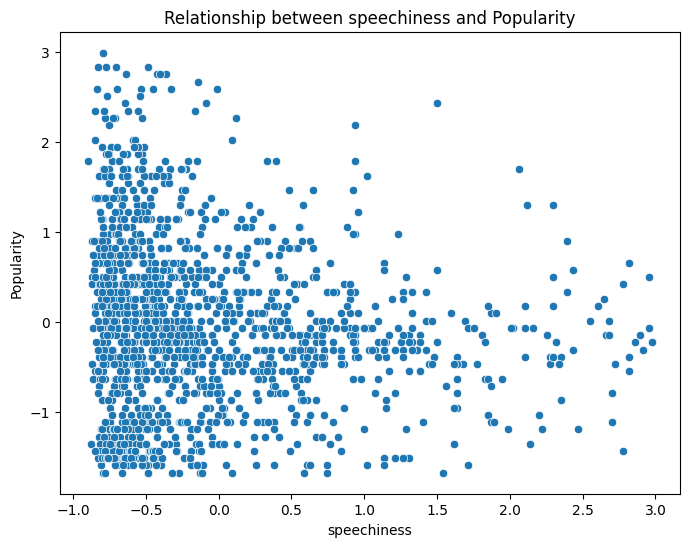

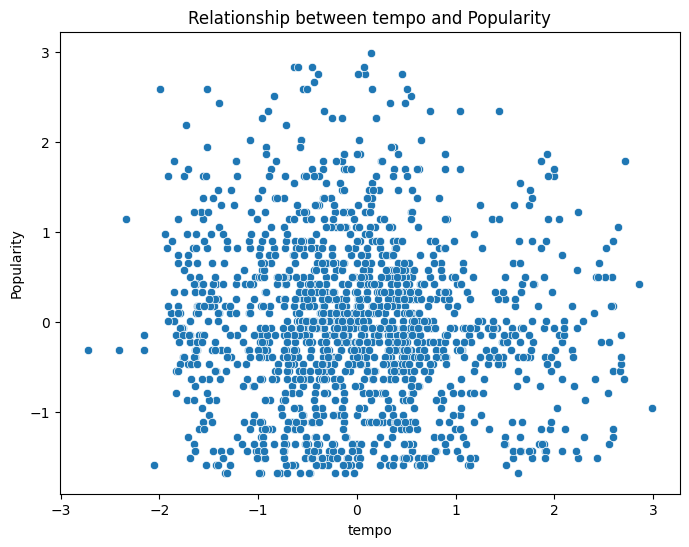

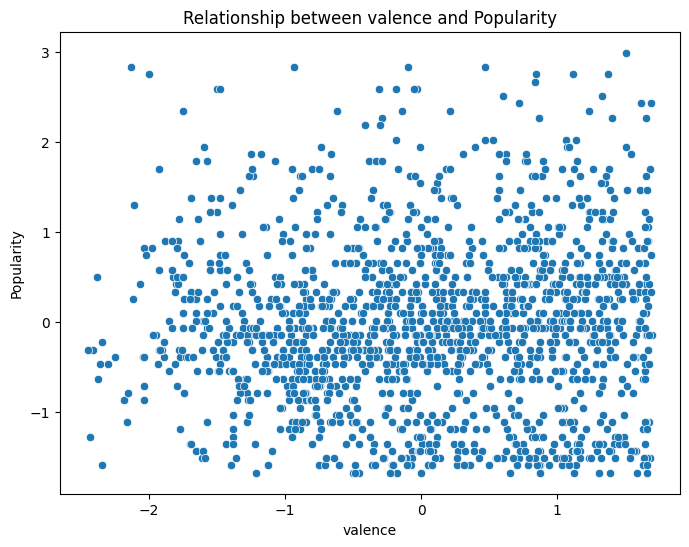

In [134]:
# Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns
features_of_songs = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# Analyze relationships between numerical features and popularity
for col in features_of_songs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['popularity'])
    plt.title(f'Relationship between {col} and Popularity')
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.show()

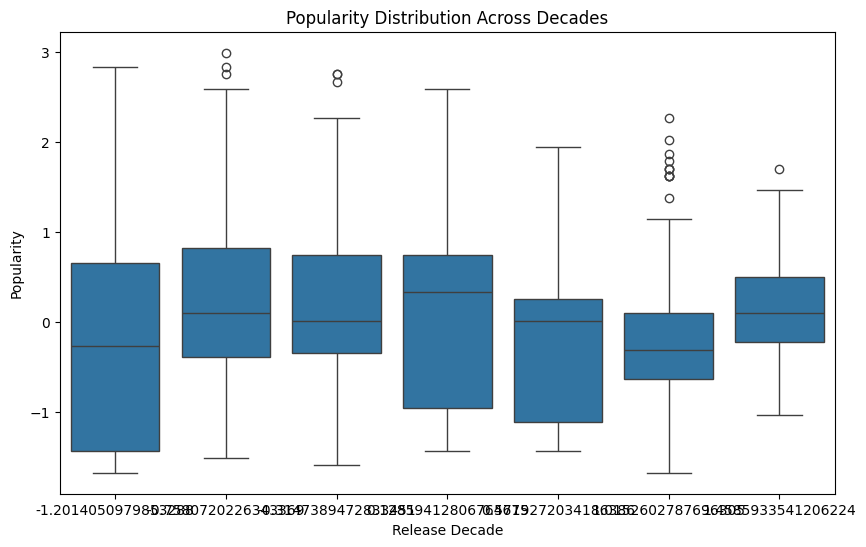

In [135]:
# Explore the distribution of popularity across different decades
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_decade', y='popularity', data=df)
plt.title('Popularity Distribution Across Decades')
plt.xlabel('Release Decade')
plt.ylabel('Popularity')
plt.show()

# Further explorations:
# - Analyze the distribution of audio features within specific decades or genres.
# - Investigate the relationship between tempo and energy.
# - Explore the evolution of audio features over time.
# - Create more visualizations to understand the data better.

# Step 4: Implement Dimensionality Reduction Technique


### Step 4.1: Determining Optimal Number of PCA Components for Clustering

Cumulative explained variance calculated.


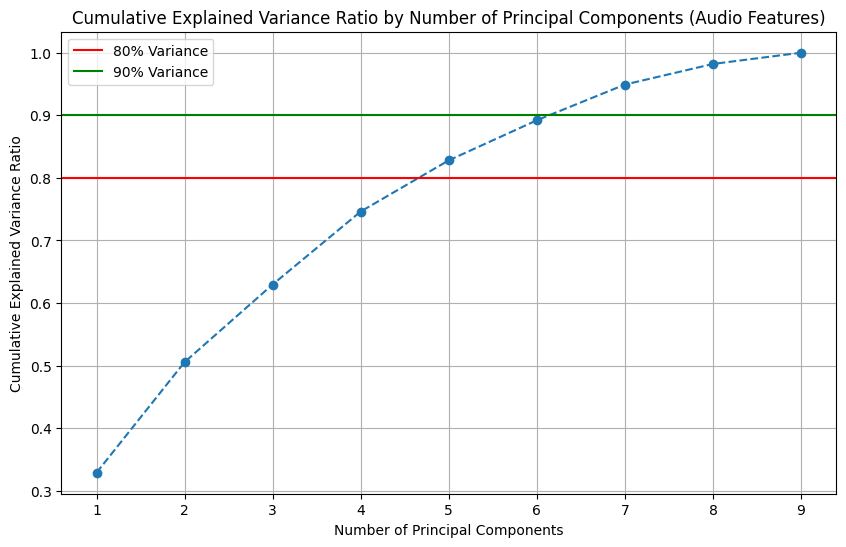


Number of components to explain >= 80% variance: 5
Number of components to explain >= 90% variance: 7

Explained Variance Ratio for each component:
Component 1: 0.3289
Component 2: 0.1767
Component 3: 0.1240
Component 4: 0.1167
Component 5: 0.0817
Component 6: 0.0640
Component 7: 0.0571
Component 8: 0.0329
Component 9: 0.0179

Cumulative Explained Variance Ratio:
Up to Component 1: 0.3289
Up to Component 2: 0.5056
Up to Component 3: 0.6296
Up to Component 4: 0.7463
Up to Component 5: 0.8280
Up to Component 6: 0.8921
Up to Component 7: 0.9491
Up to Component 8: 0.9821
Up to Component 9: 1.0000

--- Analysis of Optimal PCA Components Complete ---


In [136]:
# Dimensionality Reduction Insights
# PCA or t-SNE could reduce the dimensionality of the audio features
# (acousticness, danceability, energy, etc.) while preserving most of the variance.
# This would help visualize the data in a lower-dimensional space, identify clusters,
# and potentially discover hidden relationships between songs.

from sklearn.decomposition import PCA

# Select scaled audio features for PCA
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X_Selected_Features = df[audio_features]

# Run the PCA without limiting the number of components
pca_full = PCA(n_components=None)
pca_full.fit(X_Selected_Features)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
print("Cumulative explained variance calculated.")

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components (Audio Features)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.80, color='r', linestyle='-', label='80% Variance')
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Variance')
plt.legend()
plt.show()

# Identify the number of components required for 80% and 90% variance
# np.argmax returns the index of the first True value, add 1 for component number
n_components_80 = np.argmax(cumulative_explained_variance >= 0.80) + 1
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"\nNumber of components to explain >= 80% variance: {n_components_80}")
print(f"Number of components to explain >= 90% variance: {n_components_90}")

# Print the explained variance ratio and cumulative explained variance ratio for reference
print("\nExplained Variance Ratio for each component:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"Component {i+1}: {ratio:.4f}")

print("\nCumulative Explained Variance Ratio:")
for i, ratio in enumerate(cumulative_explained_variance):
     print(f"Up to Component {i+1}: {ratio:.4f}")

print("\n--- Analysis of Optimal PCA Components Complete ---")

 **Observation**: Based on the analysis, 5 components explain over 80% of the variance in the audio features.

**Action:** The next step is to explore clustering using 5 principal components. This involves re-running PCA with the optimal number of components (5), transforming the data, and then re-evaluating the optimal number of clusters using the elbow method and silhouette score on this 5-dimensional PCA data.

### Step 4.2: Re-run PCA with optimal components (5) and Re-evaluate Optimal Number of Clusters

In [137]:
# Instantiate a PCA object with n_components=5 (to explain ~80% variance)
n_components_optimal = 5
pca_optimal = PCA(n_components=n_components_optimal)
print(f"PCA object instantiated with {n_components_optimal} components.")

# Fit and transform the selected scaled audio features using the instantiated PCA object.
X_pca_optimal = pca_optimal.fit_transform(X_Selected_Features)
print(f"PCA fitted and transformed data into {n_components_optimal} components.")

# Store the resulting principal components in a new DataFrame for clustering
pca_component_names = [f'PC{i+1}' for i in range(n_components_optimal)]
df_pca_optimal = pd.DataFrame(X_pca_optimal, index=X_Selected_Features.index, columns=pca_component_names)
print(f"{n_components_optimal} PCA components stored in a new DataFrame.")

PCA object instantiated with 5 components.
PCA fitted and transformed data into 5 components.
5 PCA components stored in a new DataFrame.


In [138]:
df_pca_optimal.head()

PC1       PC2       PC3       PC4       PC5
1  2.023180 -1.001630  0.822827 -0.318249  0.521582
2  2.079310 -0.751710  1.271513 -0.313717  0.343542
3  2.529157 -1.968789  0.251414 -0.495280  1.227501
4  2.313539 -1.491559  0.201237 -0.435728  0.453939
5  1.780018 -1.444030  0.262393 -1.067071 -0.447660

# 5: Perform Cluster Analysis

## Step 5.1 Identify the right number of clusters

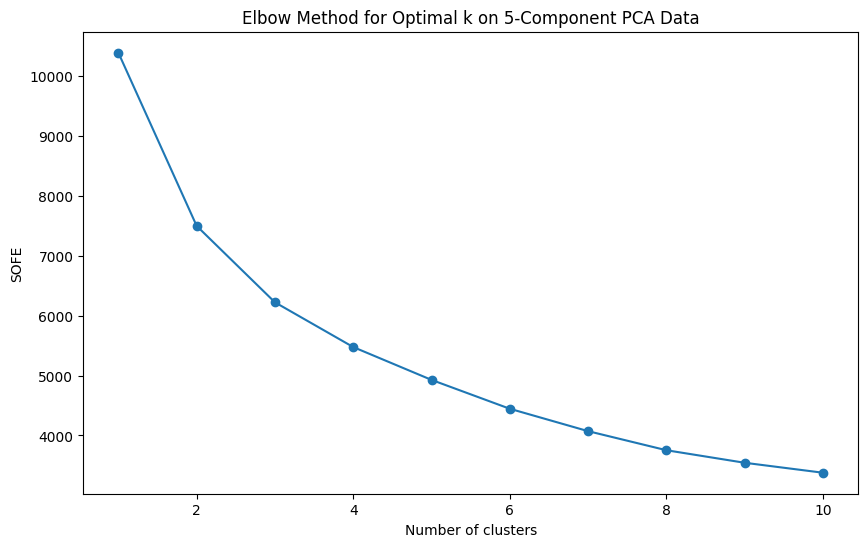

Elbow method plot generated for 5-component PCA data.


In [139]:
from sklearn.cluster import KMeans

# Determining Optimal Number of Clusters on 5-Dimensional PCA Data (e.g., using the elbow method)
sofe_pca_optimal = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init=10 for robustness
    kmeans.fit(df_pca_optimal) # Fit on the 5-dimensional PCA data
    sofe_pca_optimal.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sofe_pca_optimal, marker='o')
plt.title(f'Elbow Method for Optimal k on {n_components_optimal}-Component PCA Data')
plt.xlabel('Number of clusters')
plt.ylabel('SOFE')
plt.show()
print(f"Elbow method plot generated for {n_components_optimal}-component PCA data.")

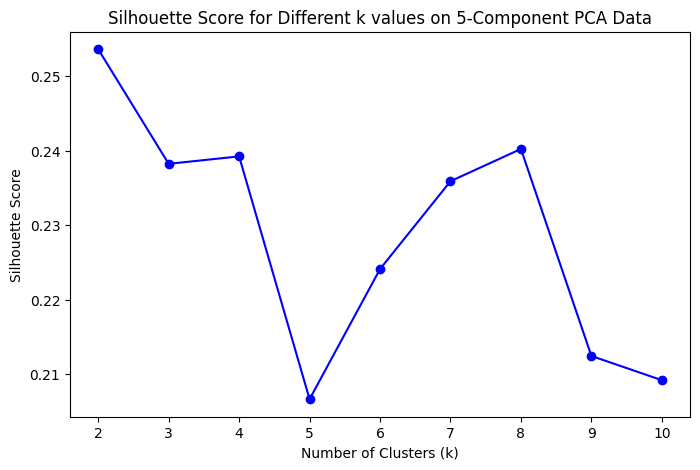

Silhouette score plot generated for 5-component PCA data.


In [140]:
from sklearn.metrics import silhouette_score

silhouette_scores_pca_optimal = []
# Silhouette score requires at least 2 clusters

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init=10
    labels = kmeans.fit_predict(df_pca_optimal) # Fit and predict on 5-dimensional PCA data
    silhouette_scores_pca_optimal.append(silhouette_score(df_pca_optimal, labels)) # Calculate on 5-dimensional PCA data and labels

# Plotting the Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores_pca_optimal, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title(f'Silhouette Score for Different k values on {n_components_optimal}-Component PCA Data')
plt.show()
print(f"Silhouette score plot generated for {n_components_optimal}-component PCA data.")


**Observations:**
- The Elbow Method suggests an optimal k around 3, where the reduction in SSE begins to plateau.
- The Silhouette highest score is at k = 2 (0.25). After that 3,4,8 are also relatively high silhouette scores (~0.238, ~0.239 and ~0.241).
   
   **Interpretation**
   k = 2 gives the best separation between clusters, but it may be overly simplistic. k = 3 could be good alternatives balancing complexity and performance.

   Score suggests an optimal k around 3, where the clusters are most distinct and well-separated.

**Note:** The Elbow Method focuses on minimizing within-cluster variance, while the Silhouette Score evaluates the quality of cluster structure. Further analysis or domain knowledge might be needed to reconcile these results and determine the most appropriate k value.

## Step 5.2 Perform KMeans Clustering

KMeans centroids (in 5D PCA space) extracted and first two dimensions selected for 2D plotting.


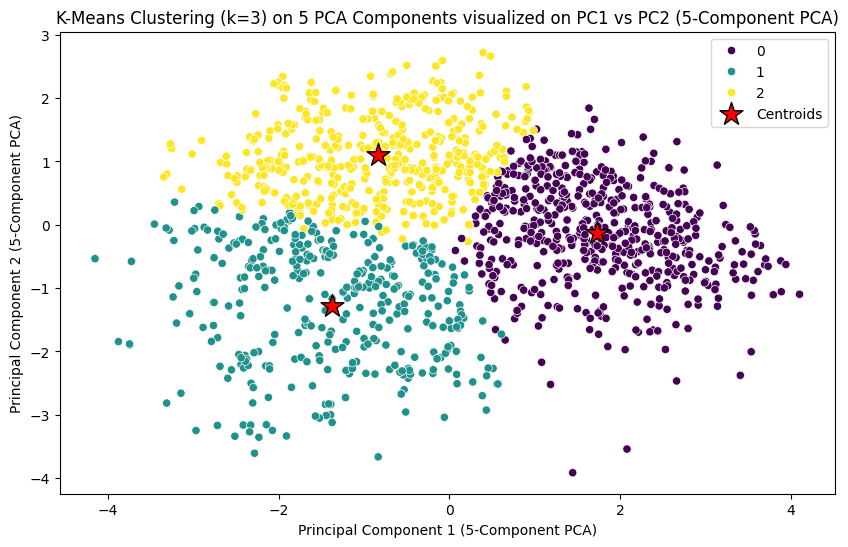


KMeans clustering visualization on 5-component PCA data complete.


name               album release_date  track_number  \
1   Street Fighting Man - Live  Licked Live In Nyc   2022-06-10             2   
2           Start Me Up - Live  Licked Live In Nyc   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In Nyc   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In Nyc   2022-06-10             5   
5            Monkey Man - Live  Licked Live In Nyc   2022-06-10             6   

                       id                                   uri  acousticness  \
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU      0.820518   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW      0.728140   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH      1.392383   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw      0.657756   
5  3ixZ1NQk5sqvBZgWeIdiqr  spotify:track:3ixZ1NQk5sqvBZgWeIdiqr      0.107886   

   danceability    energy  instrumentalness  ...  popularity  duration_ms  \
1     -1.007963  0.960062          0.249238  ...    1.063495    -0.042138   
2     -0.584626  0.982305          0.853953  ...    1.063495     0.050079   
3     -0.704571  1.071278         -0.594080  ...    0.902504     0.444539   
4     -1.170242  0.982305         -0.392050  ...    0.902504     0.437392   
5     -0.909184  0.910014         -0.141836  ...    0.822008    -0.124132   

   release_year  release_decade  pca_5_cluster       PC1       PC2       PC3  \
1          2022        1.458593              0  2.023180 -1.001630  0.822827   
2          2022        1.458593              0  2.079310 -0.751710  1.271513   
3          2022        1.458593              0  2.529157 -1.968789  0.251414   
4          2022        1.458593              0  2.313539 -1.491559  0.201237   
5          2022        1.458593              0  1.780018 -1.444030  0.262393   

        PC4       PC5  
1 -0.318249  0.521582  
2 -0.313717  0.343542  
3 -0.495280  1.227501  
4 -0.435728  0.453939  
5 -1.067071 -0.447660  

[5 rows x 25 columns]


--- Clustering on 5-Component PCA Data Complete ---


In [141]:
# Perform KMeans Clustering with k=3 on 5-Component PCA Data and Visualize

# Instantiate a KMeans object with the optimal number of clusters (k=3 based on the pre-evaluation)
optimal_k_pca = 3
kmeans_optimal_pca = KMeans(n_clusters=optimal_k_pca, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model to the 5-dimensional PCA data and predict the cluster labels.
# add these cluster labels back to the original df DataFrame for convenience in joining with other columns later.
df['pca_5_cluster'] = kmeans_optimal_pca.fit_predict(df_pca_optimal)

# Transform the KMeans cluster centers (centroids) from the 5-dimensional PCA space to the 2D PCA space for visualization.
# The centroids from kmeans_optimal_pca are in the 5-dimensional PCA space (df_pca_optimal).
# To plot them on the scatter plot of PC1 vs PC2 (which are the first two components of the 5-component PCA),
# we simply need to select the first two dimensions of these centroids.
pca_5_centroids = kmeans_optimal_pca.cluster_centers_
centroids_2d_for_plotting_pca5 = pca_5_centroids[:, :2]
print("KMeans centroids (in 5D PCA space) extracted and first two dimensions selected for 2D plotting.")

# Concatenate the new 5 PCA components to the main dataframe
df = df.join(df_pca_optimal)

# Visualize the clusters on the 2D plane of the first two components of the 5-component PCA data
plt.figure(figsize=(10,6))
# Use the new PC1 and PC2 columns which are now from the 5-component PCA
sns.scatterplot(x='PC1', y='PC2', hue='pca_5_cluster', data=df, palette='viridis', legend='full')

# Plot the transformed cluster centroids (first two dimensions of the 5D centroids)
plt.scatter(centroids_2d_for_plotting_pca5[:, 0], centroids_2d_for_plotting_pca5[:, 1],
            s=300, c='red', marker='*', label='Centroids', edgecolors='black')

# Add a title and axis labels
plt.title(f'K-Means Clustering (k={optimal_k_pca}) on 5 PCA Components visualized on PC1 vs PC2 (5-Component PCA)')
plt.xlabel('Principal Component 1 (5-Component PCA)')
plt.ylabel('Principal Component 2 (5-Component PCA)')
plt.legend()

# Display the plot.
plt.show()
print("\nKMeans clustering visualization on 5-component PCA data complete.")

# Display the first few rows with the new cluster assignments and PCA components
display(df.head())

print("\n--- Clustering on 5-Component PCA Data Complete ---")

**K-Means clustering was chosen for:**
- Its simplicity and efficiency on medium-sized numeric datasets
- The dataset's continuous numeric features, which suit K-Means well
- Easy interpretability of cluster centers
Other clustering techniques (DBSCAN, Hierarchical) could be considered in future work for non-spherical clusters.

## Step 5.3 Interpret Cluster

In [142]:
# Aggregate by cluster and calculate the mean of numeric features
cluster_summary_pca5_scaled_features = df.groupby('pca_5_cluster')[numerical_features].mean()
print("\nMean of original scaled numerical features per cluster (from 5-Component PCA clustering):")
display(cluster_summary_pca5_scaled_features)


# Calculate the mean of the PCA components (PC1, PC2, ..., PC5) for each cluster.
# We need the names of the 5 PCA components that were added to the df
pca_component_names = [f'PC{i+1}' for i in range(5)]
cluster_summary_pca5_components = df.groupby('pca_5_cluster')[pca_component_names].mean()
print("\nMean of 5 PCA components per cluster:")
display(cluster_summary_pca5_components)


# Get the most common album for each cluster
most_common_album_pca5_cluster = df.groupby('pca_5_cluster')['album'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
print("\nMost common album per cluster:")
display(most_common_album_pca5_cluster)


Mean of original scaled numerical features per cluster (from 5-Component PCA clustering):


acousticness  danceability    energy  instrumentalness  \
pca_5_cluster                                                           
0                 -0.349105     -0.735560  0.735333         -0.038697   
1                  0.750732      0.172683 -1.161713         -0.347445   
2                 -0.251713      0.734934  0.125064          0.304465   

               liveness  loudness  speechiness     tempo   valence  \
pca_5_cluster                                                        
0              0.885842  0.566182     0.482167  0.368382 -0.475556   
1             -0.543497 -0.746920    -0.450710 -0.435834 -0.412545   
2             -0.590338  0.062058    -0.412356 -0.110108  0.947535   

               popularity  duration_ms  release_decade  
pca_5_cluster                                           
0               -0.209854     0.158895        0.609000  
1                0.054186    -0.150674       -0.539169  
2                0.113403    -0.297030       -0.283132


Mean of 5 PCA components per cluster:


PC1       PC2       PC3       PC4       PC5
pca_5_cluster                                                  
0              1.730006 -0.128095 -0.064011 -0.022240 -0.033218
1             -1.370786 -1.280373 -0.032256  0.096869 -0.022824
2             -0.831779  1.101231  0.093202 -0.048928  0.052945


Most common album per cluster:


pca_5_cluster
0                Live Licks
1    Aftermath (Uk Version)
2             Honk (Deluxe)
Name: album, dtype: object

### Cluster Analysis

There three distinct clusters based on various musical attributes such as acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, and duration. Below is a breakdown of each cluster and its characteristics.


#### Cluster 0: Acoustic & Low Energy Tracks
* Acousticness: -0.349 ( Not high, actually below average)
* Danceability: -0.736 (Low)
* Energy: 0.736 ( Actually high, not low)
* Instrumentalness: -0.039 (Close to neutral)
* Liveness: 0.886 (Very high)
* Loudness: 0.566 (Loud)
* Speechiness: 0.482 (High)
* Tempo: 0.368 (Above average)
* Valence: -0.476 (Low)
* Popularity: -0.210 (Slightly below average)
* Duration: 0.159 (Slightly above average)
* Release Decade: 0.609 (More recent)


**Interpretation:**
This cluster features **energetic, loud, live-performance tracks** with high speechiness and tempo, but lower valence—possibly intense or moody in mood. These are **not acoustic or low energy**, so the original label is a mismatch.


---


#### Cluster 1: Mellow & Acoustic Tracks

* Acousticness: 0.751 ( High)
* Danceability: 0.173 ( Not very low, just slightly low)
* Energy: -1.162 ( Very low)
* Instrumentalness: -0.347 ( Not high; somewhat low)
* Liveness: -0.543 ( Low)
* Loudness: -0.747 ( Very low)
* Speechiness: -0.451 ( Low)
* Tempo: -0.436 ( Slow)
* Valence: -0.413 ( Low)
* Popularity: 0.054 ( Neutral)
* Duration: -0.151 ( Slightly short)
* Release Decade: -0.539 ( Older tracks)


**Interpretation:**
These are **very mellow, acoustic songs** with low energy and loudness, low valence, and slow tempo—**ideal for calm or introspective listening**. The songs are **not particularly danceable or instrumental.**


---

#### Cluster 2: Danceable & Feel-Good Tracks

* Acousticness: -0.252 ( Low)
* Danceability: 0.735 ( High)
* Energy: 0.125 (Low-to-moderate)
* Instrumentalness: 0.304 ( Moderately high)
* Liveness: -0.590 ( Low)
* Loudness: 0.062 ( Neutral)
* Speechiness: -0.412 ( Low)
* Tempo: -0.110 ( Slightly slow/neutral)
* Valence: 0.948 ( Very high)
* Popularity: 0.113 ( Positive)
* Duration: -0.297 ( Shorter than average)
* Release Decade: -0.283 ( Slightly older)



**Interpretation:**

These tracks are **happy, upbeat, and danceable**, with lower acoustic and speechy traits. **Energy is only moderate, not high**. Instrumentalness is elevated, but not dominant.


#### Overall Summary

* Cluster 0 (High-Energy, Live & Spoken Content): Loud, energetic, high-liveness tracks with strong speech content. Likely live rock or intense performances.
* Cluster 1 (Low-Energy Acoustic & Mellow Songs): Very soft, acoustic, slow, and introspective songs—often older tracks.
* Cluster 2 (Danceable & Feel-Good): Upbeat, happy songs with strong danceability and positivity, but only moderate energy.

These clusters effectively segment songs into relaxed/acoustic, intense/live, and danceable/upbeat categories, helping to understand the mood and characteristics of different musical selections.